In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import Orange
import matplotlib.pyplot as plt
#https://github.com/EGiunchiglia/C-HMCNN/blob/master/friedman_test.py

In [127]:
results_excel_path = './results.xls'
sheet_names = ['MAP', 'CV', 'C-MAP']
sheet_idx = 1
multiplication_factor = 1 #-1 for rank 1-6 decreasing order

In [128]:
data = pd.read_excel(results_excel_path, sheet_name=sheet_names[sheet_idx])

In [129]:
data

,Datasets,MVM,MHM,MBM,MHM-T,MBM-T,C-HMCNN
0,Expr_fun,2.75,0.72,2.21,1.61,1.52,0
1,Cellcycle_fun,1.73,0.79,1.57,0.96,0.40,0
2,Derisi_fun,2.01,0.77,1.34,1.23,0.05,0
3,spo_fun,1.42,0.86,1.53,2.68,1.21,0
4,enron,0.79,0.35,0.12,0.48,0.04,0
5,Diatoms,7.23,2.03,3.48,1.93,0.19,0
6,Imclef07a,2.98,2.27,2.92,2.49,2.83,0


In [130]:
model_names = data.columns[1:].to_list()
model_names

['MVM', 'MHM', 'MBM', 'MHM-T', 'MBM-T', 'C-HMCNN']

In [131]:
measurements = (data[data.columns[1:]].to_numpy().T)*multiplication_factor
measurements

array([[2.75, 1.73, 2.01, 1.42, 0.79, 7.23, 2.98],
       [0.72, 0.79, 0.77, 0.86, 0.35, 2.03, 2.27],
       [2.21, 1.57, 1.34, 1.53, 0.12, 3.48, 2.92],
       [1.61, 0.96, 1.23, 2.68, 0.48, 1.93, 2.49],
       [1.52, 0.4 , 0.05, 1.21, 0.04, 0.19, 2.83],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [132]:
rank_data = stats.rankdata(measurements, axis=0)
rank_data

array([[6., 6., 6., 4., 6., 6., 6.],
       [2., 3., 3., 2., 4., 4., 2.],
       [5., 5., 5., 5., 3., 5., 5.],
       [4., 4., 4., 6., 5., 3., 3.],
       [3., 2., 2., 3., 2., 2., 4.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [133]:
avranks =  np.mean(rank_data, axis=1)
avranks

array([5.71428571, 2.85714286, 4.71428571, 4.14285714, 2.57142857,
       1.        ])

In [134]:
array_ranks = [list(rank_data[i, :]) for i in range(rank_data.shape[0])]

print(*array_ranks)

[6.0, 6.0, 6.0, 4.0, 6.0, 6.0, 6.0] [2.0, 3.0, 3.0, 2.0, 4.0, 4.0, 2.0] [5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0] [4.0, 4.0, 4.0, 6.0, 5.0, 3.0, 3.0] [3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 4.0] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [135]:
stats.friedmanchisquare(*array_ranks)

FriedmanchisquareResult(statistic=28.632653061224488, pvalue=2.7369959295456058e-05)

1.6859082138297892


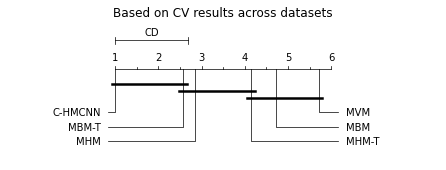

In [136]:
cd = Orange.evaluation.compute_CD(avranks, 20)
print(cd)
Orange.evaluation.graph_ranks(avranks, model_names, cd=cd, width=6, textspace=1.5)
plt.title(f"Based on {sheet_names[sheet_idx]} results across datasets")
plt.savefig(f"nemenyi_{sheet_names[sheet_idx]}.png", format='png')

In [137]:
data

,Datasets,MVM,MHM,MBM,MHM-T,MBM-T,C-HMCNN
0,Expr_fun,2.75,0.72,2.21,1.61,1.52,0
1,Cellcycle_fun,1.73,0.79,1.57,0.96,0.40,0
2,Derisi_fun,2.01,0.77,1.34,1.23,0.05,0
3,spo_fun,1.42,0.86,1.53,2.68,1.21,0
4,enron,0.79,0.35,0.12,0.48,0.04,0
5,Diatoms,7.23,2.03,3.48,1.93,0.19,0
6,Imclef07a,2.98,2.27,2.92,2.49,2.83,0


In [143]:
stats.wilcoxon(data['C-HMCNN'].to_list(), data['MBM-T'].to_list())

WilcoxonResult(statistic=0.0, pvalue=0.015625)